<a href="https://colab.research.google.com/github/jeroaj123-ux/PythonQuipuxETL/blob/main/PythonQuipux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
vidas = 3
tiene_espada = True
energia = 120
nivel = 600

if vidas < 0:
    print("Error: las vidas no pueden ser negativas. Se te ha otorgado 1 vida extra.")
    vidas = 1

if energia < 0:
    print("Error: la energía no puede ser negativa. Se te ha restaurado 40 puntos de energía.")
    energia = 40
elif energia > 100:
    print("Error: la energía no puede superar 100. Se ajusta a 100.")
    energia = 100

if nivel < 0:
    print("Error: el nivel no puede ser negativo. Se ajusta a 1.")
    nivel = 1

if vidas == 0:
    print("Has perdido todas tus vidas.")
elif 30 <= energia <= 60:
    print("Recoges una poción y recuperas energía.")
    energia += 20
    if energia > 100:
        energia = 100
    print("Energía actual:", energia)
elif vidas > 0 and tiene_espada and energia >= 70 and nivel >= 35:
    print("Puedes pelear contra el dragón.")
elif vidas > 0 and tiene_espada and energia >= 70 and nivel < 35:
    print("Puedes pelear y tienes energía, pero debes subir de nivel antes de pelear contra el dragón.")
elif vidas > 0 and tiene_espada and energia < 70 and nivel >= 35:
    print("Puedes pelear, pero necesitas descansar antes de enfrentarte al dragón.")
elif vidas > 0 and tiene_espada and energia < 70 and nivel < 35:
    print("Debes recuperar energía y subir de nivel antes de pelear contra el dragón.")
elif energia > 80 and nivel > 40 and tiene_espada and vidas > 0:
    print("El Dragon tiene que subir de nival para tener una batalla digna")
else:
    print("No puedes pelear todavía.")

if energia > 80 and nivel > 40 and tiene_espada and vidas > 0:
    print("El Dragon tiene que subir de nivel para tener una batalla digna")

print("Vidas:", vidas)
print("Energía:", energia)
print("Nivel:", nivel)


Error: la energía no puede superar 100. Se ajusta a 100.
Puedes pelear contra el dragón.
El Dragon tiene que subir de nivel para tener una batalla digna
Vidas: 3
Energía: 100
Nivel: 600


Añado al inicio del libro la actividad extra del juego del Dragon antes de iniciar el trabajo principal, el añadido con referente a la clase es darle soluciones a errores comunes en el juego, por ej tener vidas negativas.



In [39]:
pip install ucimlrepo

In [38]:
pip install pandas

In [37]:
pip install numpy

In [36]:
pip install matplotlib

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

plt.style.use("default")
plt.rcParams["figure.figsize"] = (8, 5)

In [34]:
heart_disease = fetch_ucirepo(id=45)

df = heart_disease.data.features
target = heart_disease.data.targets
meta = heart_disease.metadata

df["num"] = target["num"]

print("Vista previa de los datos:")
display(df.head())

Vista previa de los datos:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [33]:
print("Valores nulos por columna:")
print(df.isnull().sum())

for col in df.columns:
    if df[col].dtype == "object":
        print(f"Valores únicos en {col}: {df[col].unique()}")

df.replace("?", np.nan, inplace=True)

for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except Exception:
        pass

df.dropna(inplace=True)

print("Datos limpios y listos para análisis.")


Valores nulos por columna:
age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
num                  0
cholesterol_rango    0
dtype: int64
Datos limpios y listos para análisis.


El proposito de esta limpieza es mantener los datos completos de los paciones asi se evitan conclusiones incorrectas sobre estos.

In [32]:
pacientes_mayores_50 = df[df["age"] > 50]

mujeres_hipertensas = df[(df["sex"] == 0) & (df["trestbps"] > 140)]

df["cholesterol_rango"] = pd.cut(df["chol"], bins=[0, 200, 240, 600], labels=["Normal", "Alto", "Muy alto"])

print("\nDistribución por rango de colesterol:")
print(df["cholesterol_rango"].value_counts())


Distribución por rango de colesterol:
cholesterol_rango
Muy alto    151
Alto         97
Normal       49
Name: count, dtype: int64


Estas filtraciones nos ayudan a revisar de una cuantos pacientes pueden tener cierto diagnostico, como se ve en el codigo, este nos ayuda a ver cuantos pacientes tienen, el colesterol alto, muy alto o normal.

In [42]:
agrupado_sexo = df.groupby("sex")[["age", "chol", "trestbps", "thalach"]].mean().round(1)
agrupado_sexo.index = ["Mujeres", "Hombres"]
print("\nPromedios por sexo:")
print(agrupado_sexo)

agrupado_enfermedad = df.groupby("num")[["age", "chol", "thalach"]].mean().round(1)
print("\nPromedios por nivel de enfermedad :")
print(agrupado_enfermedad)


Promedios por sexo:
          age   chol  trestbps  thalach
Mujeres  55.7  261.8     133.3    151.2
Hombres  53.8  239.6     130.9    148.8

Promedios por nivel de enfermedad :
      age   chol  thalach
num                      
0    52.6  242.6    158.4
1    55.4  249.1    145.9
2    58.0  259.3    135.6
3    56.0  246.5    132.1
4    59.7  253.4    140.6


Estas agrupaciones y promedios nos ayuda a facilitar el analisis de datos, esto en un entorno de trabajo es bastante util, ayudando a los analistas a agilizar su trabajo.

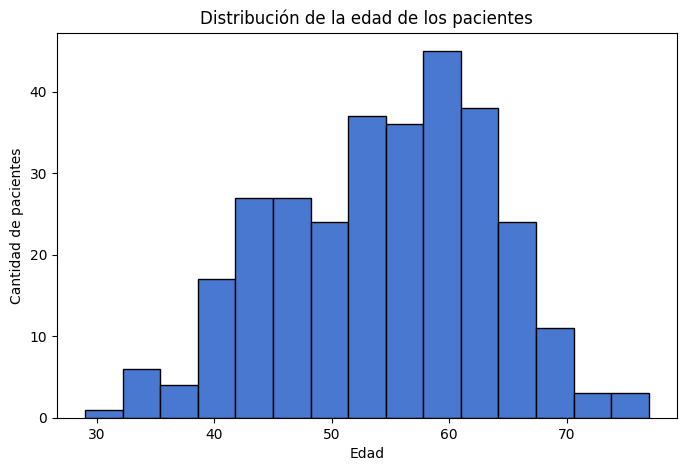

In [47]:
plt.style.use("seaborn-v0_8-muted")

plt.figure(figsize=(8,5))
plt.hist(df["age"], bins=15, edgecolor="black")
plt.title("Distribución de la edad de los pacientes")
plt.xlabel("Edad")
plt.ylabel("Cantidad de pacientes")
plt.show()

1era Grafica


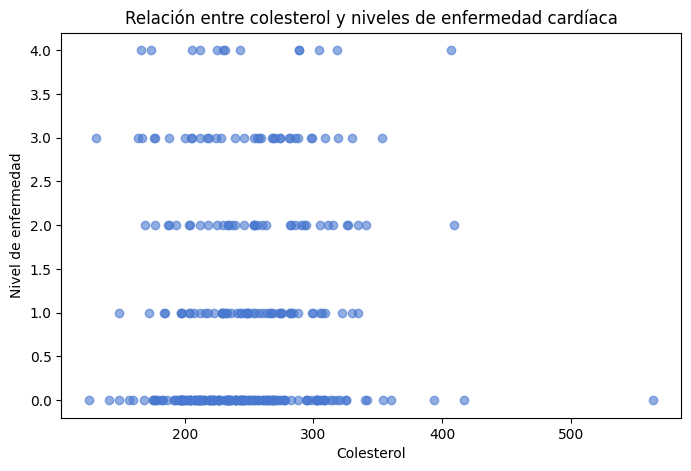

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(df["chol"], df["num"], alpha=0.6)
plt.title("Relación entre colesterol y niveles de enfermedad cardíaca")
plt.xlabel("Colesterol")
plt.ylabel("Nivel de enfermedad")
plt.show()

2da Grafica

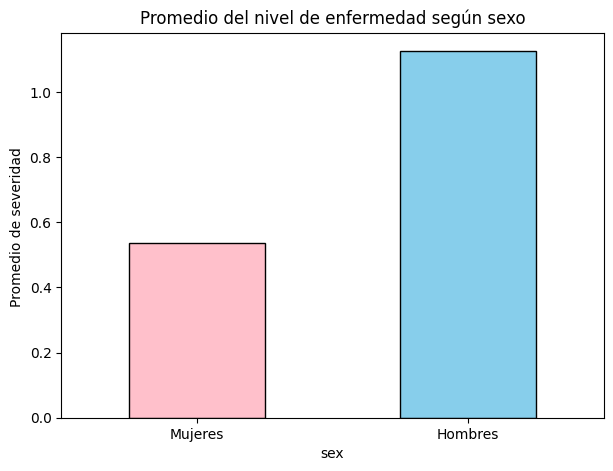

In [49]:
plt.figure(figsize=(7,5))
df.groupby("sex")["num"].mean().plot(kind="bar", color=["pink", "skyblue"], edgecolor="black")
plt.title("Promedio del nivel de enfermedad según sexo")
plt.xticks(ticks=[0,1], labels=["Mujeres", "Hombres"], rotation=0)
plt.ylabel("Promedio de severidad ")
plt.show()

3era Grafica


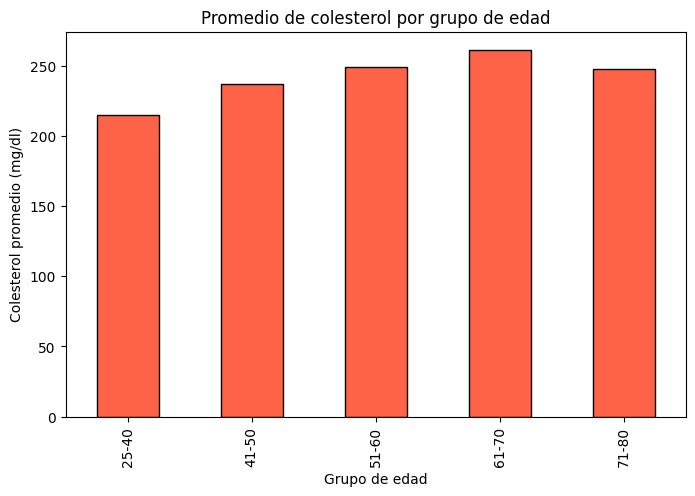

In [51]:
plt.figure(figsize=(8,5))
df["grupo_edad"] = pd.cut(df["age"], bins=[25, 40, 50, 60, 70, 80],
                          labels=["25-40", "41-50", "51-60", "61-70", "71-80"])
df.groupby("grupo_edad", observed=True)["chol"].mean().plot(kind="bar",
    color="tomato", edgecolor="black")
plt.title("Promedio de colesterol por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Colesterol promedio (mg/dl)")
plt.show()


4ta Grafica



<Figure size 800x500 with 0 Axes>

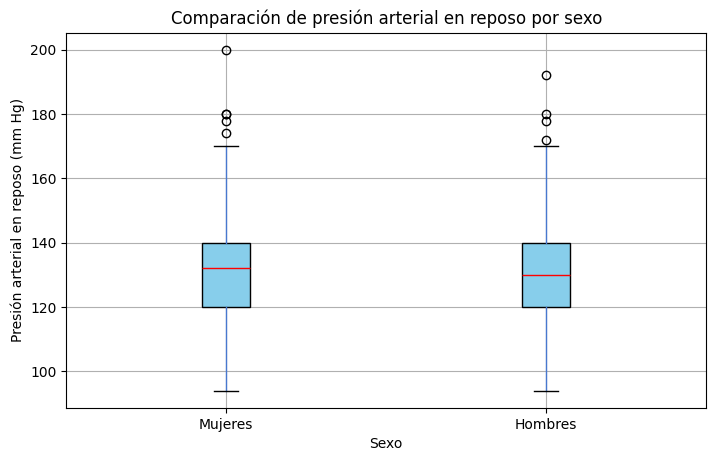

In [52]:
plt.figure(figsize=(8,5))
df.boxplot(column="trestbps", by="sex", patch_artist=True,
           boxprops=dict(facecolor="skyblue", color="black"),
           medianprops=dict(color="red"))
plt.title("Comparación de presión arterial en reposo por sexo")
plt.suptitle("")  # eliminamos título automático
plt.xticks([1, 2], ["Mujeres", "Hombres"])
plt.xlabel("Sexo")
plt.ylabel("Presión arterial en reposo (mm Hg)")
plt.show()

5ta Grafica



Conclusiones del análisis:

1. La mayoría de los pacientes en el dataset son hombres, y los hombres presentan niveles
   promedio de colesterol y presión más altos que las mujeres.

2. A medida que aumenta el valor de 'num', también aumenta la edad promedio y los niveles
   de colesterol, lo que indica que la enfermedad cardíaca tiende a empeorar con la edad
   y malos hábitos alimenticios.

3. Las mujeres muestran en general un menor promedio de severidad, aunque también existen
   casos con colesterol muy alto.

4. El análisis visual permite observar que no hay una relación lineal perfecta, pero sí
   una tendencia general entre colesterol y enfermedad cardíaca.

Reflexión:
Estos datos pueden ser útiles para reforzar campañas de prevención enfocadas en reducir
niveles de colesterol y presión arterial en adultos mayores de 50 años, especialmente
en hombres. También sería importante fomentar controles periódicos y hábitos saludables
para disminuir el riesgo de progresión de la enfermedad.

Desde una perspectiva de política pública, los resultados pueden orientar la inversión
en programas de salud preventiva, en lugar de solo tratamientos, ya que los factores
de riesgo detectables (edad, colesterol, presión) están claramente relacionados con la
severidad de la enfermedad.

Apredinzaje:
Yo ya he cursado Python en una oportunidad que me brindo la universidad de los andes, pero me alegra mucho poner en practica esto, me encanta este lenguaje y hasta tengo una app para darme concejos todos los dias, he reforzado mi conocimiento ademas de aprender muchas cosas nuevas ya que el curso era mas que todo una introduccion, me diverti mucho haciendo este trabajo, asi como su reflexion y analisis de los datos, tambien me considero amante de las matematicas entonces creo que en python es donde me entendere mas, les agradesco su tiempo profes.